In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Import Libraries**


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**Get the Data**

In [4]:
train = pd.read_csv('/content/drive/My Drive/Techgig_PredictCriminal/train.csv')
test = pd.read_csv('/content/drive/My Drive/Techgig_PredictCriminal/test.csv')

In [5]:
train.head()


,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.118526,40001,2,0


In [6]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,39705698,4,0,2,1,1,1,3,1,99,1,1,2,1,2,99,99,2,99,99,99,99,99,99,99,99,2,1,1,1,1,1,2,1,99,9,98,98,1,1,1,1,2,1,1,1,2,1,2,1,2,1,2,1,99,9,2,4,1,1,2,3,1,2,2,2,2,2,15311.127330,40043,1
1,56005698,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,1,2,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,2,1,99,9,2,2,1,3,1,1,2,2,2,3,1,1,3682.840905,40012,1
2,33115698,4,0,3,1,1,1,1,1,99,99,2,2,2,2,99,1,1,6,99,99,99,99,99,99,99,2,1,2,1,2,1,2,1,1,1,98,98,1,1,1,1,1,1,2,1,2,1,2,1,2,1,2,1,99,9,2,3,1,1,2,2,2,2,1,1,2,2,5371.083435,40039,2
3,54825698,4,0,1,1,1,1,1,1,99,99,2,2,2,2,99,2,99,99,2,4,99,99,99,99,99,2,1,2,1,2,1,2,1,2,1,98,98,2,2,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,2,2,1,1,2,2,2,2,3,3,2,2,1767.780344,40024,1
4,82835698,4,1,2,1,2,1,1,1,99,99,2,2,2,1,1,99,1,3,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,4,4,1,1,2,2,2,2,2,3,2,2,4537.959670,40019,2


In [7]:
test.shape

(5719, 71)

In [8]:
train.shape

(39999, 72)

**Exploratory Data Analysis**

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PERID,39999.0,5.444733e+07,2.555308e+07,10002216.0,3.218566e+07,5.420020e+07,7.612463e+07,9.999956e+07
IFATHER,39999.0,3.355684e+00,1.176259e+00,-1.0,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
NRCH17_2,39999.0,4.767619e-01,8.888438e-01,-1.0,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
IRHHSIZ2,39999.0,3.424611e+00,1.427695e+00,-1.0,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
IIHHSIZ2,39999.0,1.001900e+00,6.321859e-02,-1.0,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
...,...,...,...,...,...,...,...,...
AIIND102,39999.0,1.979099e+00,1.435765e-01,-1.0,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
ANALWT_C,39999.0,4.690120e+03,5.728854e+03,-1.0,1.250870e+03,2.708122e+03,5.761918e+03,1.091006e+05
VESTR,39999.0,4.002444e+04,2.006658e+02,-1.0,4.001300e+04,4.002500e+04,4.003800e+04,4.005000e+04
VEREP,39999.0,1.494387e+00,5.001247e-01,-1.0,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00


In [11]:
#checking for missing value
pd.isnull(train)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,Fal

In [12]:
train = train.dropna()
print(train.shape)
print(list(train.columns))

(39999, 72)
['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2', 'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR', 'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF', 'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR', 'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT', 'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS', 'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI', 'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC', 'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3', 'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10', 'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP', 'Criminal']


In [10]:
train.corr()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,-0.002356,-0.008012,0.001634,-0.002219,-0.002961,-0.003951,0.002033,-0.003228,-0.012677,-0.004569,-0.006635,-0.009756,-0.004870,-0.008575,0.006369,0.002996,-0.004614,0.002821,0.001458,0.000642,0.002571,0.002570,0.002591,0.002567,0.002566,-0.016317,-0.009209,0.000400,-0.007005,-0.000826,-0.005258,0.007309,-0.009302,0.004774,0.005237,0.005180,0.005180,-0.011327,-0.002899,-0.011563,0.001468,-0.002693,-0.002798,-0.009161,-0.001253,-0.008546,0.002468,-0.000139,0.000010,0.000876,0.001757,-0.000576,0.004870,0.000476,-0.000643,-0.009360,-0.010107,-0.006559,-0.000498,-0.004030,-0.010823,-0.008005,-0.007968,0.003158,-0.001296,0.003979,0.004668,-0.002466,-0.007008,0.003832,0.002303
IFATHER,-0.002356,1.000000,0.292601,-0.313069,0.018481,-0.454502,0.013882,0.123062,-0.022667,0.001758,0.751519,-0.015058,-0.006987,-0.017091,-0.023037,-0.022936,-0.131821,0.108619,-0.052067,-0.121166,-0.112487,-0.039887,-0.040011,-0.039846,-0.040171,-0.039629,0.175294,-0.014159,-0.153963,-0.007449,-0.021377,-0.014917,-0.021563,-0.020887,-0.131471,-0.126654,0.006234,0.006234,-0.011520,0.121620,-0.014851,-0.144643,0.025406,0.011478,-0.093579,-0.009522,-0.013970,-0.002489,0.007619,-0.008264,0.010035,-0.009741,-0.011295,-0.014742,-0.006304,-0.001951,0.429330,-0.110485,0.052773,0.021475,-0.000258,-0.016406,-0.003353,-0.000700,-0.008675,-0.005539,0.006124,0.006862,0.271121,0.018726,0.002522,-0.049782
NRCH17_2,-0.008012,0.292601,1.000000,0.363015,-0.049936,0.531033,-0.054299,-0.137347,-0.053805,0.049892,0.254083,-0.027922,-0.040217,-0.032866,-0.038121,0.021709,-0.059610,0.050486,-0.019690,-0.067304,-0.043921,-0.056816,-0.056586,-0.056506,-0.056364,-0.056561,-0.015173,-0.038175,0.130312,-0.032567,0.027944,-0.032721,0.026732,-0.039099,-0.055495,-0.050907,0.008519,0.008519,-0.036343,0.063206,-0.038032,0.106107,-0.024688,-0.034497,0.124883,-0.040970,0.011495,-0.039621,-0.128668,-0.029268,-0.067977,-0.028169,-0.057283,-0.035241,-0.076287,-0.065391,0.209808,0.029549,-0.024429,-0.065305,-0.112972,-0.068770,-0.013032,-0.012967,0.021258,0.025324,-0.006050,-0.005765,0.001911,0.008532,-0.000673,-0.092368
IRHHSIZ2,0.001634,-0.313069,0.363015,1.000000,-0.001737,0.759322,0.038058,-0.130286,0.045569,-0.083685,-0.283074,0.023690,0.006344,0.014236,0.021093,0.112755,-0.041306,0.051628,0.003606,-0.044616,-0.018582,-0.058342,-0.058373,-0.058381,-0.057965,-0.058264,-0.160590,0.014489,0.261966,0.013745,0.054980,0.013673,0.112702,0.015163,-0.042178,-0.045383,0.005900,0.005900,0.023843,0.046898,0.023183,0.210563,-0.011577,-0.012307,0.126685,0.034889,-0.034163,0.036789,-0.159593,0.028531,-0.076243,0.032047,-0.021671,0.026544,-0.058279,-0.065157,-0.245710,0.118886,-0.043393,0.065945,-0.154406,-0.128805,0.007647,0.005892,-0.030753,-0.029458,-0.022542,-0.021469,-0.166108,0.015224,-0.003455,-0.072246
IIHHSIZ2,-0.002219,0.018481,-0.049936,-0.001737,1.000000,-0.000805,0.507342,0.006436,0.403438,0.007811,0.020162,0.264787,0.192033,0.331903,0.212120,0.024123,0.002025,0.061291,0.007725,-0.000788,0.008262,-0.013674,-0.014920,-0.013818,-0.013645,-0.013695,0.010672,0.190708,0.006216,0.266328,0.010084,0.335234,0.011810,0.213745,-0.011084,-0.036073,0.051430,0.051430,0.194034,0.018277,0.195389,0.003385,0.412977,0.517010,0.013248,0.220173,0.008179,0.204214,0.003197,0.278213,0.019570,0.228517,-0.002594,0.265741,-0.006161,-0.049126,0.005926,-0.005760,0.128501,0.094941,0.005655,

In [17]:
# Kendall Tau correlation
train.corr('kendall')


,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,-0.001622,-0.005859,0.001212,-0.001849,-0.001758,-0.003247,0.002319,-0.003350,-0.009859,-0.003839,-0.000522,-0.014640,-0.001242,0.004696,0.004090,0.003173,-0.001503,0.004747,0.003464,0.002674,0.006404,0.006409,0.006417,0.006403,0.006407,-0.013188,-0.007525,0.000588,-0.005689,-0.000364,-0.004254,0.006050,-0.007583,0.003913,0.004465,0.004280,0.004280,-0.004288,-0.002222,-0.009420,0.001383,-0.001358,0.000187,-0.007330,-0.001000,-0.006917,0.002022,-0.000014,0.000008,0.001062,0.001449,-0.000192,0.004016,0.000456,-0.000709,-0.005392,-0.007900,-0.005329,-0.000369,-0.003216,-0.009065,-0.003888,-0.003584,0.003696,0.000224,0.003582,0.004149,-0.000440,-0.003370,0.003275,0.001821
IFATHER,-0.001622,1.000000,0.303207,-0.275820,0.015735,-0.428961,0.011119,0.118771,-0.021711,-0.002278,0.738370,-0.149728,0.172764,-0.026550,-0.032952,-0.010790,-0.127511,0.050778,-0.038878,-0.108221,-0.098754,-0.023250,-0.023313,-0.023277,-0.023351,-0.023195,0.182714,-0.015765,-0.152767,-0.009069,-0.022573,-0.017012,-0.030358,-0.022003,-0.126590,-0.122796,0.003602,0.003602,0.107636,0.119357,-0.016848,-0.143209,0.089709,0.030954,-0.088900,-0.010290,-0.010269,-0.004232,0.017436,-0.009378,0.014192,-0.011598,-0.006439,-0.016200,0.000845,0.005928,0.462338,-0.088212,0.051230,0.020174,0.009552,0.002558,-0.055178,-0.005091,-0.006570,-0.004395,0.005560,0.006287,0.278234,0.002796,0.002625,-0.053218
NRCH17_2,-0.005859,0.303207,1.000000,0.295264,-0.064055,0.476404,-0.066822,-0.140806,-0.066199,0.068125,0.271863,0.119534,-0.020807,0.015704,0.014136,0.004102,-0.051110,0.018747,-0.011856,-0.047280,-0.028278,-0.017159,-0.017089,-0.017085,-0.017008,-0.017078,-0.010452,-0.042713,0.133719,-0.038262,0.027253,-0.037412,0.021248,-0.042378,-0.050246,-0.045581,0.008557,0.008557,0.045646,0.059233,-0.041282,0.107667,0.061406,-0.032864,0.127269,-0.043974,0.016208,-0.042329,-0.120256,-0.034252,-0.063724,-0.032712,-0.053877,-0.039680,-0.070369,-0.054605,0.216467,0.028346,-0.024227,-0.062341,-0.105471,-0.062597,0.002468,0.005997,0.019889,0.021327,-0.004837,-0.004630,0.066301,0.001632,-0.000859,-0.095261
IRHHSIZ2,0.001212,-0.275820,0.295264,1.000000,-0.003467,0.677999,0.030632,-0.125457,0.038842,-0.073144,-0.257044,0.232668,-0.132145,0.050542,0.095552,0.063208,-0.033815,0.034343,-0.003687,-0.040974,-0.021937,-0.053552,-0.053607,-0.053642,-0.053490,-0.053578,-0.139737,0.012692,0.238524,0.011253,0.049333,0.011454,0.095312,0.012933,-0.034209,-0.038886,0.004090,0.004090,0.043733,0.039632,0.019614,0.191931,-0.058282,-0.064195,0.120286,0.029634,-0.027910,0.030549,-0.136693,0.023730,-0.065782,0.026760,-0.018796,0.022541,-0.048876,-0.055867,-0.230470,0.099274,-0.040417,0.056308,-0.132020,-0.118305,0.049030,0.018819,-0.028505,-0.026319,-0.020598,-0.019707,-0.110900,-0.002630,-0.002830,-0.065315
IIHHSIZ2,-0.001849,0.015735,-0.064055,-0.003467,1.000000,-0.001270,0.507305,0.003436,0.405476,-0.213457,-0.026967,0.070169,0.049061,0.090390,0.039123,0.012779,-0.038568,0.045792,-0.053687,-0.049263,-0.047459,-0.113906,-0.114411,-0.114156,-0.113985,-0.114030,0.007332,0.190632,0.000739,0.266275,0.001956,0.335194,0.009557,0.213680,-0.010520,-0.041630,0.050468,0.050468,0.068118,0.015419,0.195314,-0.000788,0.043472,0.122525,0.009315,0.220100,0.002159,0.204140,-0.000362,0.278160,0.010014,0.228451,-0.010909,0.265685,-0.006373,-0.062961,0.008268,-0.005942,0.128363,0.094686,0.002380,-0.00

In [13]:


# Spearman Rank correlation
train.corr('spearman')

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,-0.002027,-0.007491,0.001657,-0.002264,-0.002345,-0.003977,0.002882,-0.004105,-0.012088,-0.004711,-0.000641,-0.018011,-0.001524,0.005768,0.005176,0.003933,-0.001890,0.005919,0.004340,0.003350,0.007878,0.007879,0.007885,0.007877,0.007878,-0.016152,-0.009216,0.000720,-0.006967,-0.000446,-0.005209,0.007410,-0.009287,0.004848,0.005493,0.005242,0.005242,-0.005271,-0.002722,-0.011537,0.001694,-0.001663,0.000229,-0.008978,-0.001225,-0.008471,0.002476,-0.000017,0.000009,0.001301,0.001775,-0.000236,0.004919,0.000568,-0.000869,-0.007311,-0.010913,-0.006526,-0.000452,-0.003939,-0.011659,-0.004770,-0.004395,0.004662,0.000288,0.004386,0.005081,-0.000663,-0.005006,0.004011,0.002230
IFATHER,-0.002027,1.000000,0.323622,-0.315225,0.016105,-0.474211,0.011380,0.123151,-0.022227,-0.002333,0.756767,-0.153652,0.177663,-0.027217,-0.033797,-0.010973,-0.132128,0.053260,-0.040515,-0.113276,-0.103035,-0.023904,-0.023947,-0.023896,-0.023995,-0.023827,0.187010,-0.016136,-0.156359,-0.009282,-0.023104,-0.017412,-0.031072,-0.022520,-0.131167,-0.126165,0.003686,0.003686,0.110691,0.122164,-0.017244,-0.146576,0.091899,0.031702,-0.090991,-0.010532,-0.010510,-0.004332,0.017846,-0.009599,0.014526,-0.011871,-0.006590,-0.016580,0.000929,0.006121,0.522850,-0.102302,0.052434,0.020649,0.009776,0.002935,-0.056560,-0.005218,-0.006930,-0.004745,0.005691,0.006435,0.349542,0.003471,0.002687,-0.054470
NRCH17_2,-0.007491,0.323622,1.000000,0.327999,-0.066805,0.497571,-0.069690,-0.148814,-0.069071,0.071188,0.284318,0.124868,-0.021777,0.016387,0.014772,0.004509,-0.053998,0.020197,-0.012604,-0.050530,-0.030129,-0.018049,-0.017941,-0.017933,-0.017852,-0.017931,-0.010901,-0.044545,0.139456,-0.039904,0.028422,-0.039018,0.022159,-0.044197,-0.053044,-0.047785,0.008924,0.008924,0.047765,0.061775,-0.043054,0.112286,0.064061,-0.034280,0.132730,-0.045861,0.016903,-0.044145,-0.125416,-0.035722,-0.066458,-0.034116,-0.056189,-0.041382,-0.074146,-0.057252,0.248990,0.033429,-0.025267,-0.065016,-0.109996,-0.068374,0.002576,0.006259,0.021370,0.023444,-0.005045,-0.004829,0.084681,0.002055,-0.000896,-0.099349
IRHHSIZ2,0.001657,-0.315225,0.327999,1.000000,-0.003896,0.758182,0.034426,-0.144303,0.043672,-0.082296,-0.289365,0.262046,-0.149172,0.056880,0.107784,0.074344,-0.038469,0.039540,-0.004222,-0.047097,-0.025154,-0.060492,-0.060500,-0.060494,-0.060364,-0.060458,-0.157042,0.014264,0.268062,0.012647,0.055442,0.012873,0.107115,0.014535,-0.038910,-0.043882,0.004596,0.004596,0.049368,0.044541,0.022043,0.215699,-0.065567,-0.072202,0.135183,0.033304,-0.031366,0.034333,-0.153621,0.026669,-0.073928,0.030074,-0.021124,0.025332,-0.055462,-0.063042,-0.287260,0.126409,-0.045422,0.063282,-0.148369,-0.139708,0.055178,0.021178,-0.032942,-0.031136,-0.023149,-0.022148,-0.153016,-0.003602,-0.003181,-0.073405
IIHHSIZ2,-0.002264,0.016105,-0.066805,-0.003896,1.000000,-0.001378,0.507306,0.003482,0.405630,-0.213684,-0.027008,0.070337,0.049290,0.090515,0.039259,0.013180,-0.039041,0.046923,-0.054695,-0.050388,-0.048412,-0.114481,-0.114891,-0.114563,-0.114496,-0.114515,0.007332,0.190632,0.000739,0.266275,0.001956,0.335194,0.009557,0.213680,-0.010647,-0.041809,0.050469,0.050469,0.068410,0.015420,0.195314,-0.000788,0.043512,0.122601,0.009315,0.220100,0.002159,0.204140,-0.000362,0.278161,0.010015,0.228451,-0.010909,0.265685,-0.006433,-0.063223,0.009141,-0.006726,0.128363,0.094686,0.002380,-0.00

Do not show any strong correlation among attributes

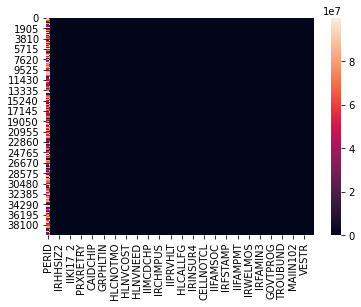

In [14]:
sns.heatmap(train)


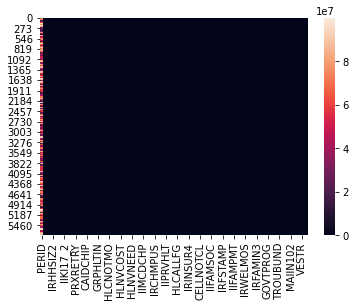

In [15]:
sns.heatmap(test)


**EDA**

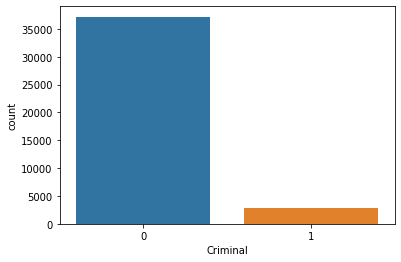

In [18]:
sns.countplot(x='Criminal', data=train);


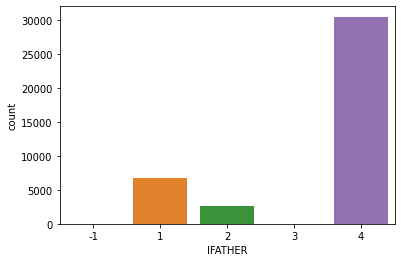

In [19]:
sns.countplot(x='IFATHER', data=train);

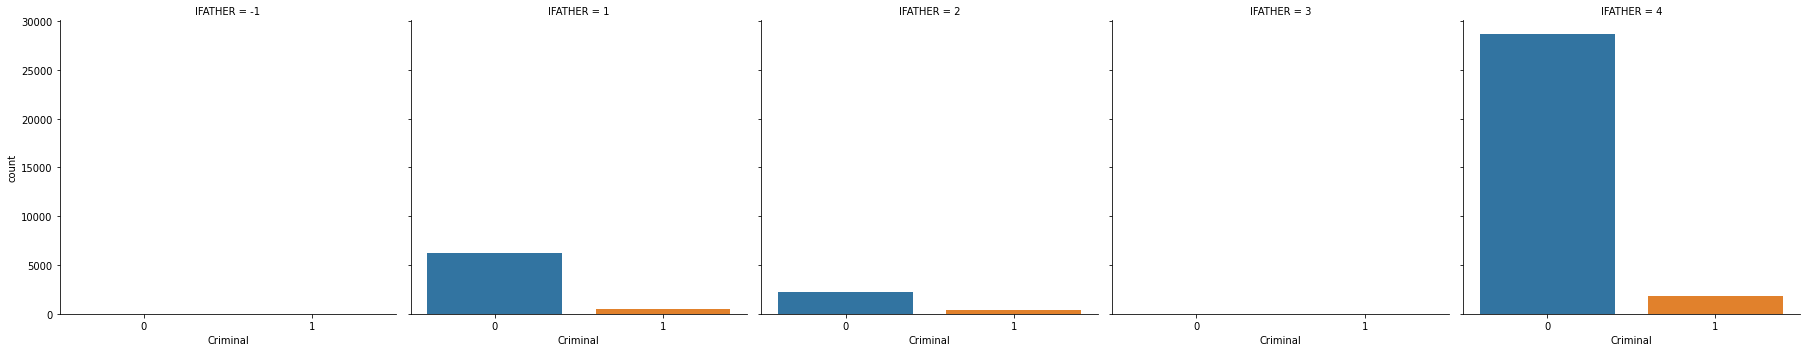

In [20]:
#feature 'criminal' split (faceted) over the feature 'IFATHER'.
sns.factorplot(x='Criminal', col='IFATHER', kind='count', data=train);

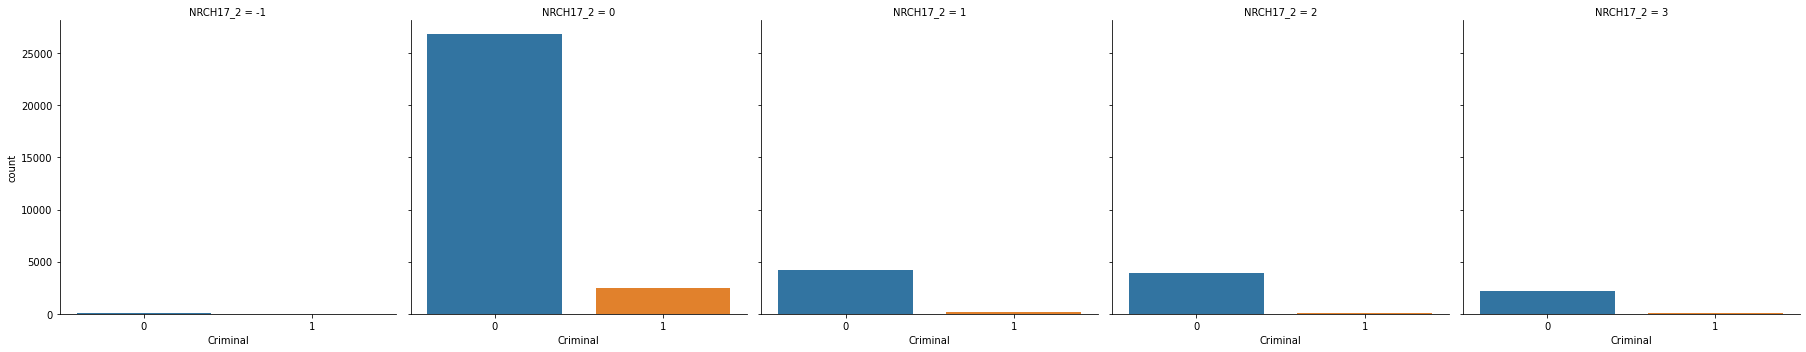

In [21]:
sns.factorplot(x='Criminal', col='NRCH17_2', kind='count', data=train);

In [22]:
train.groupby('Criminal').PDEN10.describe()


,count,mean,std,min,25%,50%,75%,max
Criminal,,,,,,,,
0,37208.0,1.638008,0.617501,-1.0,1.0,2.0,2.0,3.0
1,2791.0,1.718739,0.614114,1.0,1.0,2.0,2.0,3.0


In [23]:
train.groupby('Criminal').IRHH65_2.describe()


,count,mean,std,min,25%,50%,75%,max
Criminal,,,,,,,,
0,37208.0,1.148328,0.448143,-1.0,1.0,1.0,1.0,3.0
1,2791.0,1.354353,0.661416,1.0,1.0,1.0,1.5,3.0


**separating our independent and dependent variable**

In [24]:

X = train.drop(['Criminal'], axis=1)
y = train["Criminal"]

In [26]:
print (X.head(1))


      PERID  IFATHER  NRCH17_2  IRHHSIZ2  ...  AIIND102     ANALWT_C  VESTR  VEREP
0  25095143        4         2         4  ...         2  3884.805998  40026      1

[1 rows x 71 columns]


In [27]:
print (y.head(1))

0    0
Name: Criminal, dtype: int64


**split into train and test**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [30]:
final_test = sc.transform(test)


In [31]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.metrics import confusion_matrix

**logistc regression**

In [32]:
#logistc regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.94


In [34]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12317
           1       0.59      0.36      0.45       883

    accuracy                           0.94     13200
   macro avg       0.77      0.67      0.71     13200
weighted avg       0.93      0.94      0.93     13200



In [35]:
print (confusion_matrix(y_pred, y_test))

[[12090   561]
 [  227   322]]


In [36]:
accuracy_score(y_pred, y_test)


0.9403030303030303

**knn classifier**

In [37]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.94


**Gaussian Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.411


**support vector machine**

In [39]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.947


**Decision Tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( max_depth=5, 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.909


**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)

0.953


**Gradient Boosting Classifier**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)
y_pred = gradient.predict(x_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.954


In [45]:
test_prediction = logreg.predict(final_test)
test.shape
test.head()
test.to_csv( '/content/drive/My Drive/Techgig_PredictCriminal/final_submission.csv' , index = False )